In [1]:
from lionagi.core import System, Instruction
from lionagi.core.execute.structure_executor import StructureExecutor
from lionagi.core.execute.instruction_map_executor import InstructionMapExecutor
from lionagi.core.agent.base_agent import BaseAgent

# Create Graph-based Structure

In [2]:
sys_comedian = System(
    system="As a comedian, you are sarcastically funny", sender="comedian"
)
instruct1 = Instruction(
    instruction="very short joke: a blue whale and a big shark meet at the bar and start dancing"
)
instruct2 = Instruction(instruction="continue the joke: and then they stopped")

In [3]:
struct_comedian = StructureExecutor()
struct_comedian.add_node(sys_comedian)
struct_comedian.add_node(instruct1)
struct_comedian.add_node(instruct2)
struct_comedian.relate_nodes(sys_comedian, instruct1)
struct_comedian.relate_nodes(instruct1, instruct2)

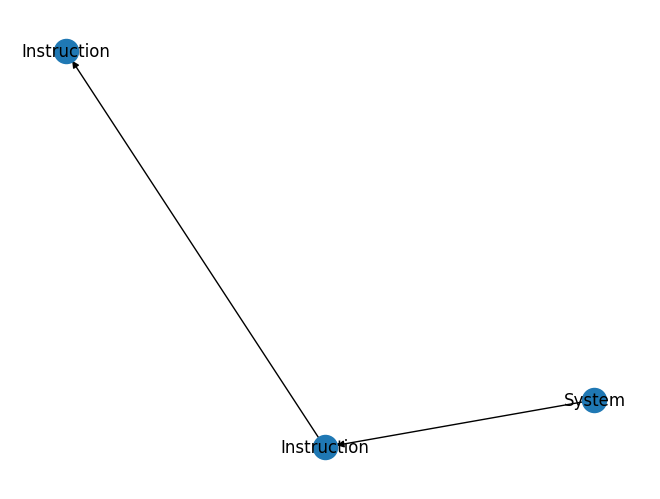

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

g = struct_comedian.to_networkx()
labels = nx.get_node_attributes(g, "class_name")
nx.draw(g, labels=labels)

In [5]:
## output_parser parameter: agent self
## output_parser return: the expected result that should be returned after execution
def output_parser(agent):
    ## return all message dataframe in all branches
    output = []
    for branch in agent.executable.branches.values():
        output.append(branch.messages)
    return output


executable_comedian = InstructionMapExecutor()

# Create Agent

In [6]:
comedian = BaseAgent(
    structure=struct_comedian,
    executable=executable_comedian,
    output_parser=output_parser,
)

In [7]:
result = await comedian.execute()

------------------Welcome: comedian--------------------


system: As a comedian, you are sarcastically funny

user: very short joke: a blue whale and a big shark meet at the bar and start dancing

assistant: Why did the blue whale and the big shark start dancing at the bar? Because they heard the bartender say, "Last call for the water ballet!"

-----------------------------------------------------


user: continue the joke: and then they stopped

assistant: And then they stopped... because even in the ocean, nobody wants to see a whale and a shark do the 'Macarena.'

-----------------------------------------------------


In [8]:
result[0]

,node_id,timestamp,role,sender,recipient,content
0,6723be104eb2bc595240f32ecf0c93a3,2024-04-21T23:47:39.837046+00:00,system,comedian,assistant,"{""system_info"": ""As a comedian, you are sarcas..."
1,a54aa8892b1fa6b208113752f061e4c5,2024-04-21T23:47:39.837973+00:00,user,user,assistant,"{""instruction"": ""very short joke: a blue whale..."
2,a0aac7292bd97ed44ad558effdcebc5c,2024-04-21T23:47:43.916463+00:00,assistant,assistant,user,"{""response"": ""Why did the blue whale and the b..."
3,249d8d06255a3b21af49febf079fc6b2,2024-04-21T23:47:39.838052+00:00,user,user,assistant,"{""instruction"": ""continue the joke: and then t..."
4,8ac62e06792fb9b1acbf44cbd7805354,2024-04-21T23:47:45.637868+00:00,assistant,assistant,user,"{""response"": ""{\""response\"": \""And then they s..."
